In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential


train data 확인

In [2]:
dfTrain = pd.read_csv('./labelsCsv/trainLabels.csv')
dfTrain

,Unnamed: 0,bBoxW,bBoxH,bBoxX,width,height,categoryId,bBoxY,fileName,categoryName
0,0,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _066_42469394.jpg,검멀레동굴
1,1,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _067_42469395.jpg,검멀레동굴
2,2,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _068_42469396.jpg,검멀레동굴
3,3,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _104_42469397.jpg,검멀레동굴
4,4,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _106_42469399.jpg,검멀레동굴
...,...,...,...,...,...,...,...,...,...,...
5590,5590,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_335_39296063.jpg,휴애리자연생활공원
5591,5591,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_338_39296069.jpg,휴애리자연생활공원
5592,5592,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_339_39296074.jpg,휴애리자연생활공원
5593,5593,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_340_39296075.jpg,휴애리자연생활공원


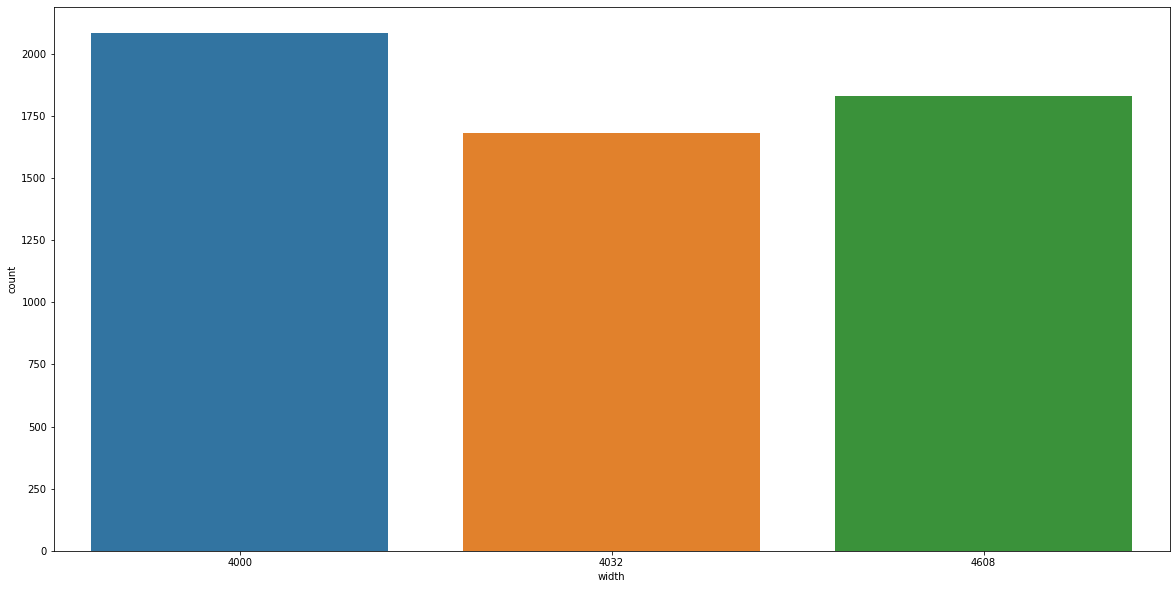

In [3]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.countplot(x="width", data=dfTrain)

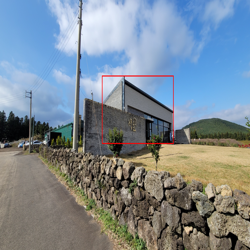

In [4]:
from PIL import Image
from PIL import ImageDraw

imgSample = Image.open('./dataSet/images/'+dfTrain['categoryName'][1234]+'/'+dfTrain['fileName'][1234])

draw = ImageDraw.Draw(imgSample)
draw.rectangle([dfTrain['bBoxX'][1234], dfTrain['bBoxY'][1234], dfTrain['bBoxW'][1234], dfTrain['bBoxH'][1234]], outline="red", width=9)
imgSampleResized = imgSample.resize((250, 250))
imgSampleResized

test data 확인

In [5]:
dfTest = pd.read_csv('./labelsCsv/testLabels.csv')
dfTest

,Unnamed: 0,bBoxW,bBoxH,bBoxX,width,height,categoryId,bBoxY,fileName,categoryName
0,0,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _117_42469410.jpg,검멀레동굴
1,1,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _128_42469421.jpg,검멀레동굴
2,2,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _143_42469436.jpg,검멀레동굴
3,3,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _153_42469446.jpg,검멀레동굴
4,4,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _179_42469472.jpg,검멀레동굴
...,...,...,...,...,...,...,...,...,...,...
735,735,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_313_39296015.jpg,휴애리자연생활공원
736,736,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_328_39296042.jpg,휴애리자연생활공원
737,737,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_331_39296053.jpg,휴애리자연생활공원
738,738,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_341_39296080.jpg,휴애리자연생활공원


In [6]:
dfVal = pd.read_csv('./labelsCsv/ValLabels.csv')
dfVal

,Unnamed: 0,bBoxW,bBoxH,bBoxX,width,height,categoryId,bBoxY,fileName,categoryName
0,0,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _105_42469398.jpg,검멀레동굴
1,1,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _131_42469424.jpg,검멀레동굴
2,2,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _134_42469427.jpg,검멀레동굴
3,3,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _144_42469437.jpg,검멀레동굴
4,4,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _164_42469457.jpg,검멀레동굴
...,...,...,...,...,...,...,...,...,...,...
674,674,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_253_39295900.jpg,휴애리자연생활공원
675,675,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_285_39295963.jpg,휴애리자연생활공원
676,676,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_304_39295997.jpg,휴애리자연생활공원
677,677,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_308_39296008.jpg,휴애리자연생활공원


In [7]:
categoryName = list(dfTrain['categoryName'].unique())

dfTrain['categoryNumber'] = 0
dfTest['categoryNumber'] = 0
dfVal['categoryNumber'] = 0

for i in dfTrain.index:
  dfTrain['categoryNumber'][i] = categoryName.index(dfTrain['categoryName'][i])

for i in dfTest.index:
  dfTest['categoryNumber'][i] = categoryName.index(dfTest['categoryName'][i])

for i in dfVal.index:
  dfVal['categoryNumber'][i] = categoryName.index(dfVal['categoryName'][i])

dfVal

C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['categoryNumber'][i] = categoryName.index(dfTrain['categoryName'][i])
C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['categoryNumber'][i] = categoryName.index(dfTest['categoryName'][i])
C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Unnamed: 0,bBoxW,bBoxH,bBoxX,width,height,categoryId,bBoxY,fileName,categoryName,categoryNumber
0,0,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _105_42469398.jpg,검멀레동굴,0
1,1,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _131_42469424.jpg,검멀레동굴,0
2,2,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _134_42469427.jpg,검멀레동굴,0
3,3,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _144_42469437.jpg,검멀레동굴,0
4,4,4000.0,2252.0,0.0,4000,2252,20813,0.0,검멀레동굴 _164_42469457.jpg,검멀레동굴,0
...,...,...,...,...,...,...,...,...,...,...,...
674,674,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_253_39295900.jpg,휴애리자연생활공원,43
675,675,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_285_39295963.jpg,휴애리자연생활공원,43
676,676,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_304_39295997.jpg,휴애리자연생활공원,43
677,677,4608.0,2592.0,0.0,4608,2592,20595,0.0,휴애리자연생활공원_308_39296008.jpg,휴애리자연생활공원,43


이미지 읽기

In [8]:
imageHeight = 250
imageWidth = 250
imageChannel = 3

trainImages = []
trainLabels = []

for i in tqdm(range(len(dfTrain))):
    img = load_img('./dataSet/images/'+dfTrain['categoryName'][i]+'/'+dfTrain['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    trainImages.append(img)

100%|██████████| 5595/5595 [06:27<00:00, 14.44it/s]


In [9]:
testImages = []
testLabels = []

for i in tqdm(range(len(dfTest))):
    img = load_img('./dataSet/images/'+dfTest['categoryName'][i]+'/'+dfTest['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    testImages.append(img)

100%|██████████| 740/740 [00:48<00:00, 15.14it/s]


In [10]:
valImages = []
valLabels = []

for i in tqdm(range(len(dfVal))):
    img = load_img('./dataSet/images/'+dfVal['categoryName'][i]+'/'+dfVal['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    valImages.append(img)

100%|██████████| 679/679 [00:45<00:00, 14.99it/s]


In [11]:
trainLabels = dfTrain['categoryNumber'].values
trainLabels

array([ 0,  0,  0, ..., 43, 43, 43], dtype=int64)

In [12]:
testLabels = dfTest['categoryNumber'].values
testLabels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [13]:
valLabels = dfVal['categoryNumber'].values
valLabels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [14]:
len(dfTest['categoryNumber'].unique())

44

In [15]:
x_train = np.array(trainImages)
y_train = np.array(trainLabels)

x_test = np.array(testImages)
y_test = np.array(testLabels)

x_val = np.array(valImages)
y_val = np.array(valLabels)

ValueError: Data cardinality is ambiguous:
  x sizes: 679
  y sizes: 0
Make sure all arrays contain the same number of samples

오류 확인 -> 해결

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5595, 250, 250, 3)
(5595,)
(740, 250, 250, 3)
(740,)
(679, 250, 250, 3)
(679,)


In [17]:
x_train, x_test, x_val = x_train/255.0, x_test/255.0, x_val/255.0

In [18]:
x_train, x_test, x_val

(array([[[[0.8509804 , 0.8627451 , 0.8980392 ],
          [0.84705883, 0.85882354, 0.89411765],
          [0.8509804 , 0.8627451 , 0.8980392 ],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765]],
 
         [[0.84313726, 0.85490197, 0.8901961 ],
          [0.84705883, 0.85882354, 0.89411765],
          [0.84313726, 0.85882354, 0.89411765],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765],
          [0.8509804 , 0.8627451 , 0.8901961 ]],
 
         [[0.84705883, 0.85882354, 0.89411765],
          [0.84705883, 0.85882354, 0.8862745 ],
          [0.84705883, 0.85882354, 0.89411765],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.8509804 , 0.8627451 , 0.8901961 ],
          [0.8509804 , 0.8627451 , 0.8901961 ]],
 
         ...,
 
         [[0.52156866, 0.56078434, 0.59607846],
          [0.50196

cnn 모델 설정

In [19]:
model = Sequential([    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(imageHeight, imageWidth, imageChannel)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(44, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 124, 124, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 64)        0

모델 컴파일

In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
# 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 성능을 확인해보고 값을 증가 시켜 봅시다. 
EPOCHS = 1

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_val, y_val), # validation 데이터 사용
                    epochs=EPOCHS, 
                   )

175/175 [==============================] - 248s 1s/step - loss: 3.9088 - accuracy: 0.1004 - val_loss: 2.6167 - val_accuracy: 0.3328


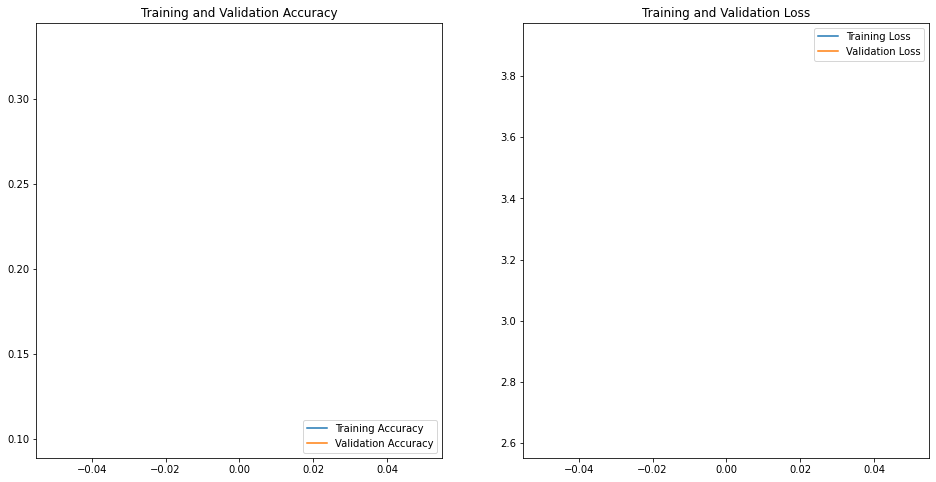

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()